# 주식:현금:채권 혼합 전략  p151
 - 투자자산 : SPY, SHY, TLT
 - 매수원칙 : 1:1:1로 매수
 - 매도원칙 : 매월말 리밸런싱

그림 2-18

In [1]:
from settings import *

In [2]:
tickers = ['SPY', 'SHY', 'IEF', 'TLT']
read_df = yf.download(tickers)['Adj Close']
read_df.info()

[*********************100%***********************]  4 of 4 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7299 entries, 1993-01-29 to 2022-01-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IEF     4906 non-null   float64
 1   SHY     4906 non-null   float64
 2   SPY     7299 non-null   float64
 3   TLT     4906 non-null   float64
dtypes: float64(4)
memory usage: 285.1 KB


In [3]:
for c in read_df.columns:
    print(c, read_df[c].first_valid_index())

IEF 2002-07-30 00:00:00
SHY 2002-07-30 00:00:00
SPY 1993-01-29 00:00:00
TLT 2002-07-30 00:00:00


In [4]:
data = read_df['2002-7-30':].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4906 entries, 2002-07-30 to 2022-01-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IEF     4906 non-null   float64
 1   SHY     4906 non-null   float64
 2   SPY     4906 non-null   float64
 3   TLT     4906 non-null   float64
dtypes: float64(4)
memory usage: 191.6 KB


In [5]:
주식현금채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)

In [6]:
bt_spy = long_only_ew(data, ['SPY'], 'SPY', initial_capital=100000000)
bt_shy = long_only_ew(data, ['SHY'], 'SHY', initial_capital=100000000)
bt_ief = long_only_ew(data, ['IEF'], 'IEF', initial_capital=100000000)
bt_tlt = long_only_ew(data, ['TLT'], 'TLT', initial_capital=100000000)

In [7]:
bt_test10 = bt.Backtest(주식현금채권혼합전략, data[['SPY', 'SHY', 'IEF']], name='1:1:1(10년국채)', initial_capital=100000000)
bt_test20 = bt.Backtest(주식현금채권혼합전략, data[['SPY', 'SHY', 'TLT']], name='1:1:1(20년국채)', initial_capital=100000000)


In [8]:
r20 = bt.run(bt_test20)
r20_assets = bt.run(bt_spy, bt_shy, bt_tlt)
r20_all = bt.run(bt_spy, bt_shy, bt_tlt, bt_test20)

2002-07-30 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-31 00:00:00
2003-01-31 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-31 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-28 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-31 00:00:00
2005-01-31 00:00:00
2005-02-28 00:00:00
2005-03-31 00:00:00
2005-04-29 00:00:00
2005-05-31 00:00:00
2005-06-30 00:00:00
2005-07-29 00:00:00
2005-08-31 00:00:00
2005-09-30 00:00:00
2005-10-31 00:00:00
2005-11-30 00:00:00
2005-12-30 00:00:00
2006-01-31 00:00:00
2006-02-28 00:00:00
2006-03-31 00:00:00
2006-04-28 00:00:00
2006-05-31 00:00:00
2006-06-30 00:00:00
2006-07-31 00:00:00


In [9]:
r20.backtests['1:1:1(20년국채)'].stats.display()

Stats for price from 2002-07-29 00:00:00 - 2022-01-21 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
258.06%             1.11  6.77%   -15.17%

Annualized Returns:
mtd     3m      6m      ytd     1y     3y      5y     10y    incep.
------  ------  ------  ------  -----  ------  -----  -----  --------
-3.78%  -0.83%  -0.50%  -3.78%  3.56%  10.53%  8.09%  7.09%  6.77%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.11     1.20       1.16
mean    6.74%    6.68%      6.51%
vol     6.06%    5.59%      5.60%
skew    -0.28    -0.79      -0.20
kurt    7.25     3.03       -0.63
best    3.35%    5.07%      16.30%
worst   -3.52%   -7.24%     -3.78%

Drawdowns:
max      avg       # days
-------  ------  --------
-15.17%  -0.78%     20.29

Misc:
---------------  ------
avg. up month    1.39%
avg. down month  -1.16%
up year %        85.00%
12m up %  

In [10]:
r20_all.display()

Stat                 SPY         SHY         TLT         1:1:1(20년국채)
-------------------  ----------  ----------  ----------  -----------------
Start                2002-07-29  2002-07-29  2002-07-29  2002-07-29
End                  2022-01-21  2022-01-21  2022-01-21  2022-01-21
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         602.15%     44.93%      240.30%     258.06%
Daily Sharpe         0.62        1.41        0.52        1.11
Daily Sortino        0.97        2.41        0.88        1.81
CAGR                 10.52%      1.92%       6.49%       6.77%
Max Drawdown         -55.19%     -2.23%      -26.59%     -15.17%
Calmar Ratio         0.19        0.86        0.24        0.45

MTD                  -7.79%      -0.48%      -3.08%      -3.78%
3m                   -3.10%      -0.75%      1.12%       -0.83%
6m                   1.47%       -1.15%      -2.30%      -0.50%
YTD                  -7.79%      -0.48%      -3.08%      -3.78%
1Y                 

In [11]:
r20_all.prices.resample('M').last().to_drawdown_series().describe()

,SPY,SHY,TLT,1:1:1(20년국채)
count,235.000,235.000,235.000,235.000
mean,-0.059,-0.002,-0.069,-0.011
std,0.102,0.003,0.059,0.020
min,-0.508,-0.012,-0.218,-0.134
25%,-0.069,-0.002,-0.110,-0.014
50%,-0.011,-0.000,-0.060,-0.001
75%,0.000,0.000,-0.015,0.000
max,0.000,0.000,0.000,0.000


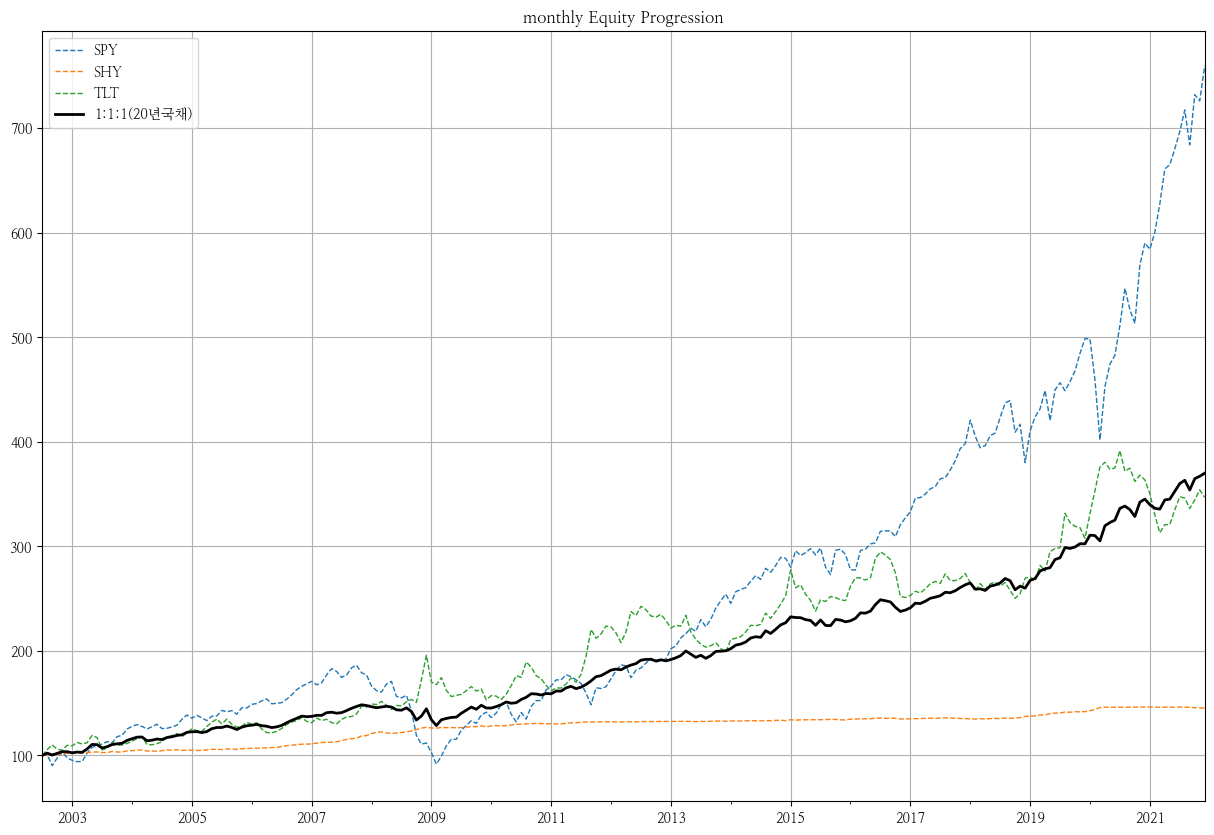

In [12]:
ax1 = r20_assets.plot(freq='M', ls='--', figsize=(15,10));
r20.plot(ax=ax1, freq='M', color='black', lw=2, figsize=(15, 10));